In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customers=pd.read_csv("Customers.csv")
products=pd.read_csv("Products.csv")
transactions=pd.read_csv("Transactions.csv")

In [68]:
print(customers.head(),"\n")
print(products.head(),"\n")
print(transactions.head())

  CustomerID        CustomerName         Region SignupDate
0      C0001    Lawrence Carroll  South America 2022-07-10
1      C0002      Elizabeth Lutz           Asia 2022-02-13
2      C0003      Michael Rivera  South America 2024-03-07
3      C0004  Kathleen Rodriguez  South America 2022-10-09
4      C0005         Laura Weber           Asia 2022-08-15 

  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31 

  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T0027

In [70]:
print("Customers Info :",customers.info(),"\n")
print("Products Info :",products.info(),"\n")
print("Transactions Info :",transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 6.4+ KB
Customers Info : None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB
Products Info : None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data colum

In [72]:
print(customers.isnull().sum(),"\n")
print(products.isnull().sum(),"\n")
print(transactions.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64 

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64 

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [76]:
print(customers.describe(),"\n")
print(products.describe(),"\n")
print(transactions.describe())

                SignupDate
count                  200
mean   2023-07-19 08:31:12
min    2022-01-22 00:00:00
25%    2022-09-26 12:00:00
50%    2023-08-31 12:00:00
75%    2024-04-12 12:00:00
max    2024-12-28 00:00:00 

            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000 

                     TransactionDate     Quantity   TotalValue       Price
count                           1000  1000.000000  1000.000000  1000.00000
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000
std               

### 1. Customer Demographics Analysis


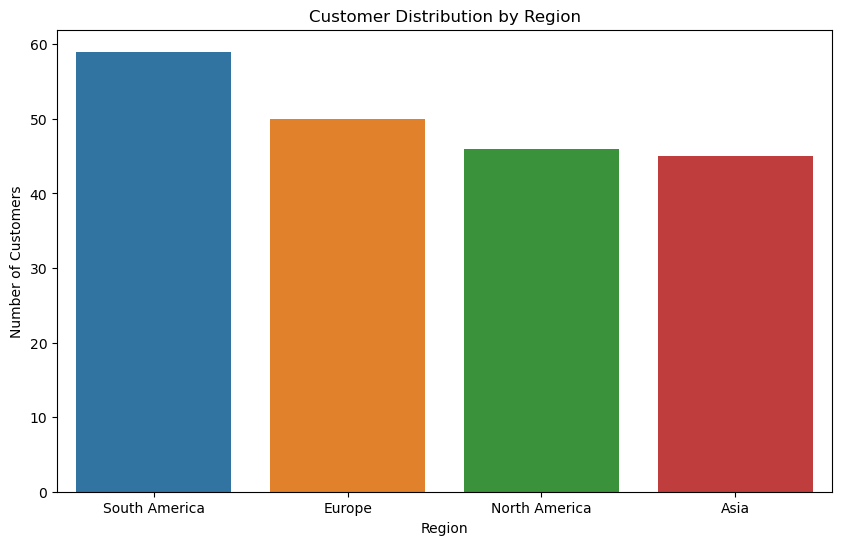

In [54]:
customer_counts = customers['Region'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=customer_counts.index, y=customer_counts.values)
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()

Insights show that South America has the highest customer base, indicating a strong market presence, while Asia has the least. This highlights the need for targeted marketing strategies in Asia to increase brand awareness and customer acquisition.

### 2. Most Popular Products

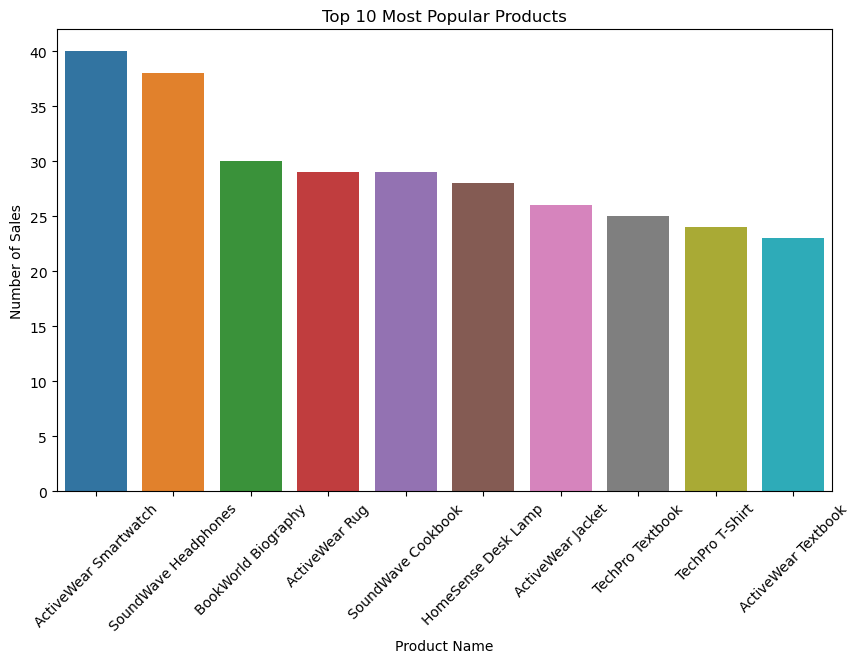

In [55]:
# Merge transactions with products to get product names
merged_data = transactions.merge(products[['ProductID', 'ProductName']], on='ProductID')

product_sales = merged_data['ProductName'].value_counts()
top_products = product_sales.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.index, y=top_products.values)
plt.title('Top 10 Most Popular Products')
plt.xlabel('Product Name')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.show()

The analysis reveals that the Activewear Smartwatch is the most popular product, while the Activewear Textbook ranks the lowest in sales. This suggests that expanding the Activewear product line or enhancing its features could further drive sales.

### 3. Monthly Sales Trends

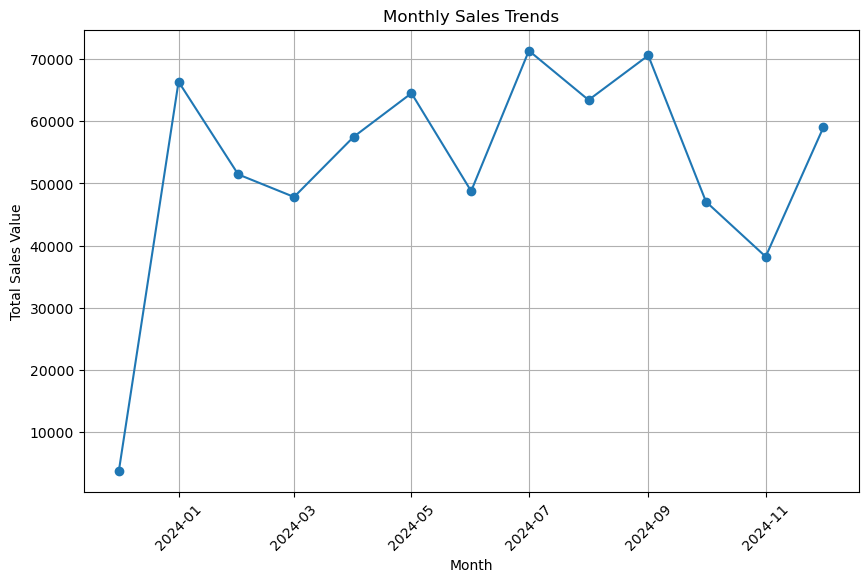

In [58]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'], format='%Y-%m-%d %H:%M:%S')

# Check if TotalValue is numeric
transactions['TotalValue'] = pd.to_numeric(transactions['TotalValue'], errors='coerce')

# Group by month and sum the TotalValue
sales_trends = transactions.groupby(transactions['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()

# Reset index to plot correctly
sales_trends.index = sales_trends.index.to_timestamp()

plt.figure(figsize=(10, 6))
plt.plot(sales_trends.index, sales_trends.values, marker='o')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales Value')
plt.xticks(rotation=45)
plt.grid()
plt.show()


The analysis of monthly sales trends reveals a consistent pattern of increases and decreases, indicating a stable market environment. This cyclical behavior suggests that sales fluctuate predictably over time, which can be attributed to seasonal demand or promotional activities.

### 4. Total Sales by Product Category

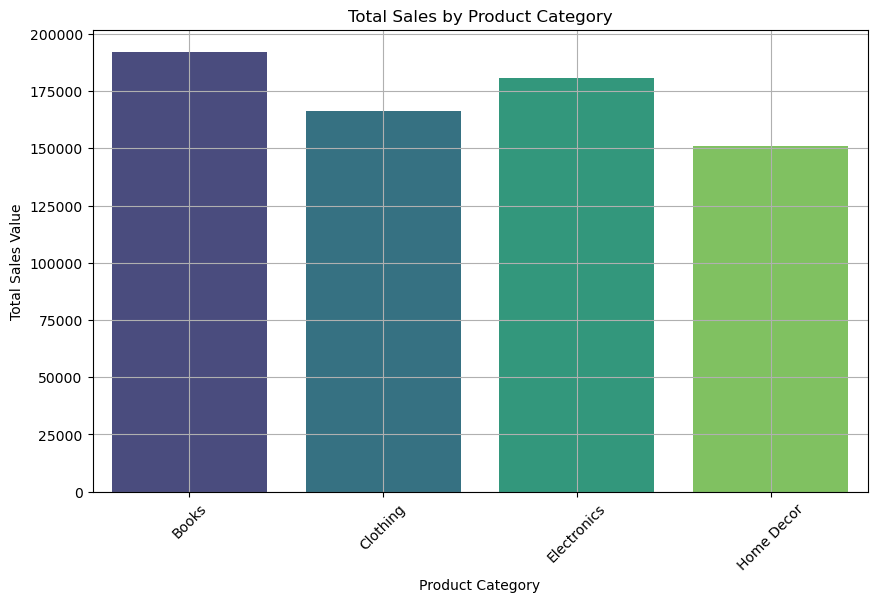

In [64]:
# Calculate total sales by product category
category_sales = transactions.merge(products[['ProductID', 'Category']], on='ProductID')
category_sales_summary = category_sales.groupby('Category')['TotalValue'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=category_sales_summary, x='Category', y='TotalValue', palette='viridis')
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Value')
plt.xticks(rotation=45)
plt.grid()
plt.show()


 The analysis indicates that the Books category generates the highest sales, reflecting strong consumer interest, while Home Decor shows the least sales. This suggests that focusing marketing efforts on promoting Home Decor items could help boost their performance.

### 5. Customer Signup trends over time

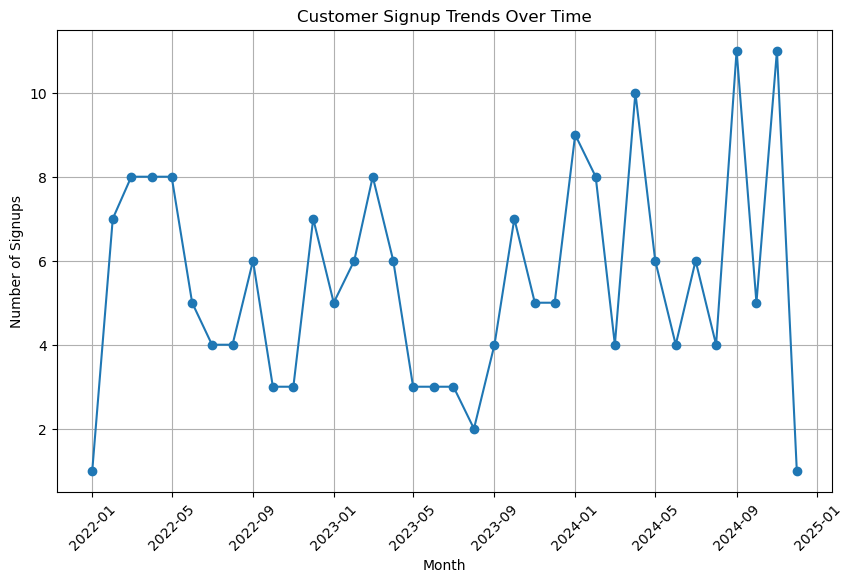

In [65]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'], format='%d-%m-%Y')

# Group by month and count the number of signups
signup_trends = customers.groupby(customers['SignupDate'].dt.to_period('M')).size()

# Reset index to plot correctly
signup_trends.index = signup_trends.index.to_timestamp()

# Plotting customer signup trends over time
plt.figure(figsize=(10, 6))
plt.plot(signup_trends.index, signup_trends.values, marker='o')
plt.title('Customer Signup Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Signups')
plt.xticks(rotation=45)
plt.grid()
plt.show()


 The signup trends reveal that customer registrations are lower in the middle of the month but tend to increase significantly towards the end. This pattern suggests a potential opportunity to enhance promotional activities during slower signup periods to attract more customers.